In [1]:
import numpy as np
import pandas as pd

# Data

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv', decimal=',')
df_train.Age = df_train['Age'].astype(float)
df_test = pd.read_csv('/kaggle/input/titanic/test.csv', decimal=',')
df_test.Age = df_test['Age'].astype(float)

df_all = pd.concat([df_train, df_test], sort=False, copy=False, ignore_index=True)

**Train Data**

In [3]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null object
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


**Test Data**

In [4]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null object
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**All Date**

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null object
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


# Analyse Data

**Probability to survive according to *Pclass***

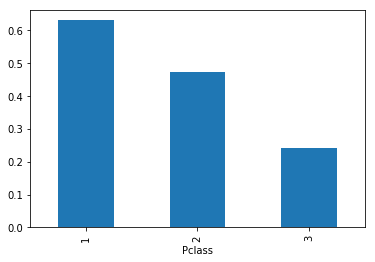

In [6]:
tmp = df_train.groupby('Survived').Pclass
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

**Probability to survive according to *Sex***

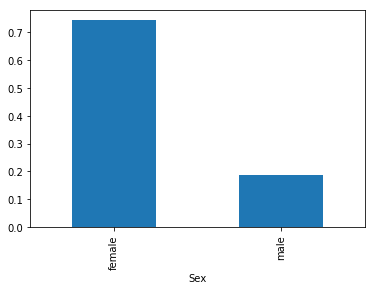

In [7]:
tmp = df_train.groupby('Survived').Sex
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

**Probability to survive according to *Age***

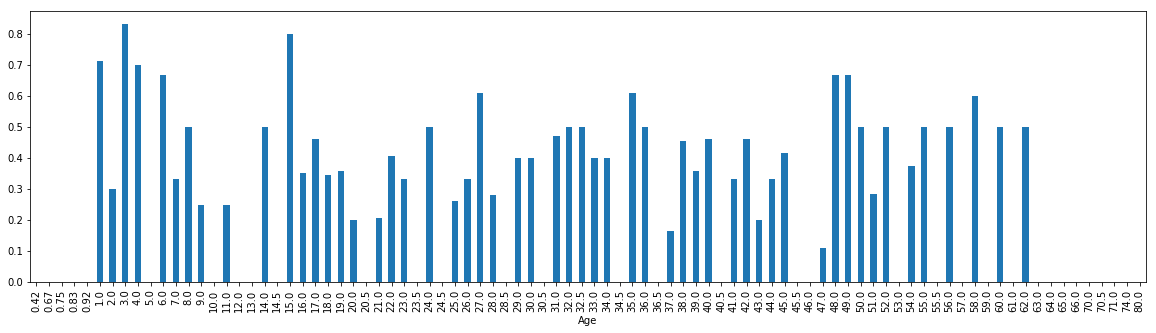

In [8]:
tmp = df_train.groupby('Survived').Age
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar(figsize=[20,5])
#tmp.plot.hist(alpha=0.7, legend=True, bins=25)

**Probability to survive according to *Parch***

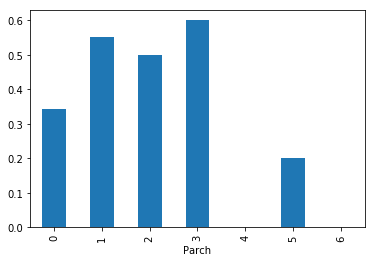

In [9]:
tmp = df_train.groupby('Survived').Parch
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

**Probability to survive according to *SibSp***

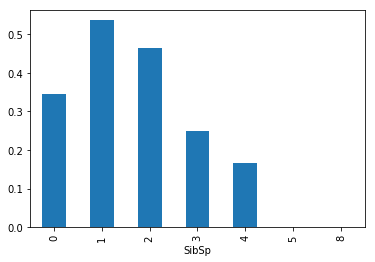

In [10]:
tmp = df_train.groupby('Survived').SibSp
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()

**Probability to survive according to *Fare***

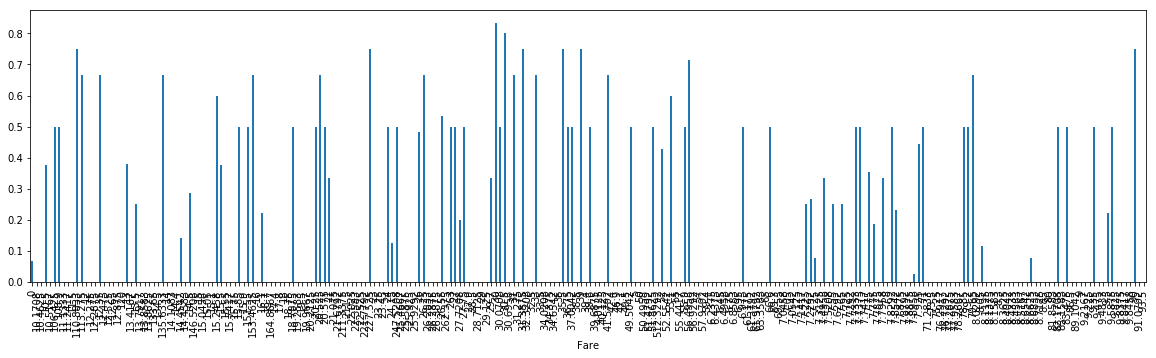

In [11]:
tmp = df_train.groupby('Survived').Fare
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar(figsize=[20,5])

**Probability to survive according to *Embarked***

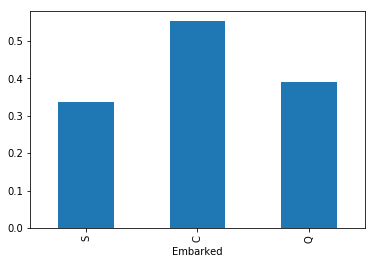

In [12]:
tmp = df_train.groupby('Survived').Embarked
(tmp.value_counts()[1] / (tmp.value_counts()[1] + tmp.value_counts()[0])).fillna(0).plot.bar()


**Probability to survive according to *Title***

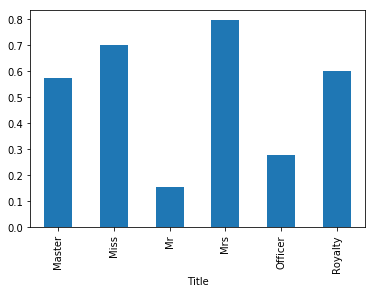

In [13]:
def makeTitle(df):
    for index, row in df.iterrows():
        pos_comma = row['Name'].find(',')
        pos_point = row['Name'].find('.')
        df.at[index, 'Title'] = (row['Name'][pos_comma+2:pos_point])
        
    titles = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Mme":        "Mrs",
        "Mlle":       "Miss",
        "Ms":         "Mrs",
        "Mr" :        "Mr",
        "Mrs" :       "Mrs",
        "Miss" :      "Miss",
        "Master" :    "Master",
        "Lady" :      "Royalty"
    }
    df.Title = df.Title.map(titles)
    
    return df
        
tmp = makeTitle(df_train)
tmp = tmp.groupby(['Survived', 'Title'])
(tmp.size()[1] / (tmp.size()[1] + tmp.size()[0])).fillna(0).plot.bar()

**Probability to survive if travelling in group. **
(Group = all people in a group have the same ticket *number*)

In [14]:
import re

def getTicketNumber(df):
    df = df.copy()
    for index,row in df.iterrows():
        if (row['Ticket'] == 'LINE'):
            df.at[index, 'Ticket'] = -1
        else:
            ticketNum = re.sub('[^0-9]','', row['Ticket'])
            df.at[index, 'Ticket'] = float(ticketNum)
    df.astype({'Ticket': 'int32'}).dtypes
    return df

tmp = getTicketNumber(df_train)
tmp = tmp.groupby(['Ticket']).agg({'PassengerId':'count', 'Survived':'mean'})
tmp = tmp.rename(columns={"PassengerId": "Count", "Survived": "Survived %"})

In [15]:
print('Traveling in Group')
print('Average group size: ' + str(tmp[tmp['Count'] > 1].mean()['Count']))
print('Chances to survive in a group: ' + str(tmp[tmp['Count'] > 1].mean()['Survived %']))
print()
print('Traveling alone')
print('Average group size: ' + str(tmp[tmp['Count'] == 1].mean()['Count']))
print('Chances to survive in a group: ' + str(tmp[tmp['Count'] == 1].mean()['Survived %']))

Traveling in Group
Average group size: 2.5703703703703704
Chances to survive in a group: 0.5583774250440916

Traveling alone
Average group size: 1.0
Chances to survive in a group: 0.2959558823529412


> # Data pre-processing
* Filling the age data gaps

In [16]:
def fillingGaps(df):
    for index, row in df.iterrows():
        if (np.isnan(row.Age)):
            df.loc[index, 'Age'] = df[(df.Sex == row.Sex) & (df.Pclass == row.Pclass)].Age.mean()

    
    return df

df_all = fillingGaps(df_all)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null object
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


# Create new features
* Title
* Traveling in Group

In [17]:
df_all = makeTitle(df_all)
df_all = getTicketNumber(df_all)
df_all['travelingInGroup'] = df_all.duplicated(['Ticket'], keep=False)
df_all.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,travelingInGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.25,NaN,S,Mr,False


# Data Transformation
* Pclass
* Sex
* Embarked
* Title

In [18]:
def tranformData(df):  
    df = df.copy()
    for index in df.index:   
        
        #PClass
        pClass = df.iloc[index].Pclass
        if pClass == 1:
            df.at[index,'Pclass_1'] = 1
        elif pClass == 2:
            df.at[index,'Pclass_2'] = 1
        elif pClass == 3:
            df.at[index,'Pclass_3'] = 1
      
        #Sex
        sex = df.iloc[index].Sex
        if(sex == 'male'):
            df.at[index, 'Sex'] = 0
        elif(sex == 'female'):
            df.at[index, 'Sex'] = 1
        
        #Embarked
        embarked = df.iloc[index].Embarked
        if embarked == 'Q':
            df.at[index, 'EmbarkedQ'] = 1
        elif embarked == 'C':
            df.at[index, 'EmbarkedC'] = 1
        elif embarked == 'S':
            df.at[index, 'EmbarkedS'] = 1

    
        #Title
        title = df.iloc[index].Title
        df.at[index, title] = 1
        
            
    df = df.drop(columns=['Pclass', 'Title', 'Embarked'])
    df = df.fillna(0);
    
    return df

tmp = tranformData(df_all)
df_all = tmp
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
PassengerId         1309 non-null int64
Survived            1309 non-null float64
Name                1309 non-null object
Sex                 1309 non-null int64
Age                 1309 non-null float64
SibSp               1309 non-null int64
Parch               1309 non-null int64
Ticket              1309 non-null float64
Fare                1309 non-null object
Cabin               1309 non-null object
travelingInGroup    1309 non-null bool
Pclass_3            1309 non-null float64
EmbarkedS           1309 non-null float64
Mr                  1309 non-null float64
Pclass_1            1309 non-null float64
EmbarkedC           1309 non-null float64
Mrs                 1309 non-null float64
Miss                1309 non-null float64
EmbarkedQ           1309 non-null float64
Master              1309 non-null float64
Pclass_2            1309 non-null float64
Royalty             1309 

In [19]:
df_all.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mr,Pclass_1,EmbarkedC,Mrs,Miss,EmbarkedQ,Master,Pclass_2,Royalty,Officer
0,1,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,521171.0,7.25,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Select feature for training
* Sex
* Age 
* Pclass 
* Title
* TravelingInGroup 
* Fare 
* SibSp 
* Parch 
* Embarked


In [20]:
df_sub = df_all.drop(['Name', 'Cabin', 'PassengerId', 'Survived', 'Ticket'], 1)
df_sub.head(1)

,Sex,Age,SibSp,Parch,Fare,travelingInGroup,Pclass_3,EmbarkedS,Mr,Pclass_1,EmbarkedC,Mrs,Miss,EmbarkedQ,Master,Pclass_2,Royalty,Officer
0,0,22.0,1,0,7.25,False,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split training and test Data

In [21]:
y = df_train[:891].Survived

In [22]:
X_train = df_sub[:891]
X_test = df_sub[891:]

# Train and Test

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def testRandomForestClassifier(X, y):
    clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=0)
    result = cross_val_score(clf , X, y , cv=10)
    print(result)
    print(result.mean())
    clf.fit(X,y)
    return pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance',ascending=False)

In [24]:
testRandomForestClassifier(X_train, y)

[0.76666667 0.8        0.74157303 0.85393258 0.88764045 0.84269663
 0.80898876 0.76404494 0.88764045 0.84090909]
0.8194092611508342


,importance
Fare,0.178541
Mr,0.165276
Age,0.164482
Sex,0.137402
Pclass_3,0.053951
Miss,0.050078
SibSp,0.048021
Pclass_1,0.037855
Parch,0.031915
Pclass_2,0.025226


**Remove unimportant features**

In [25]:
X_train = X_train.drop(['Pclass_1','Pclass_2', 'Royalty', 'Officer', 'Master', 'Parch','EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],1)
X_test = X_test.drop(['Pclass_1','Pclass_2', 'Royalty', 'Officer', 'Master', 'Parch','EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],1)

In [26]:
testRandomForestClassifier(X_train, y)

[0.8        0.87777778 0.75280899 0.86516854 0.91011236 0.82022472
 0.82022472 0.7752809  0.88764045 0.82954545]
0.8338783906480536


,importance
Fare,0.245765
Mr,0.210219
Age,0.206651
Sex,0.093509
Pclass_3,0.073104
SibSp,0.067390
Miss,0.044841
Mrs,0.036422
travelingInGroup,0.022097


# Test Hyperparameter

In [27]:
test_params = dict(     
    min_samples_split = [2,3,4,5], 
    min_samples_leaf = [2,3,4], 
    max_depth = [10,20,30],
    n_estimators = [10,20,30],
)

clf = RandomForestClassifier(n_jobs=-1)
clf_cv = GridSearchCV(estimator=clf,param_grid=test_params, cv=5) 
clf_cv.fit(X_train, y)

print('Best score: ' + str(clf_cv.best_score_))
print('Optimal params: ' + str(clf_cv.best_estimator_))

Best score: 0.8383838383838383
Optimal params: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


# Submission

In [28]:
def predictAndSave(X, clf, name): 
    result = clf.predict(X)
    df_result = pd.DataFrame(data=result, columns=['Survived'])

    df_result = pd.concat([df_test, df_result], axis=1)
    df_result = df_result[['PassengerId', 'Survived']]
    df_result.head(6)
    df_result.to_csv('submission-' + name + '.csv', index=False)
    return df_result

In [29]:
result = predictAndSave(X_test, clf_cv.best_estimator_, 'randomForest')
result.head(5)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
